In [ ]:
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
class Maze:
    def __init__(self, rows, cols, wall_list , wall_density=0.2,stochastic_wall = False):
        self.rows = rows
        self.cols = cols
        self.grid = np.zeros((rows, cols), dtype=int)
        if stochastic_wall:
            self.generate_grid(wall_density)
        else:
            self.generate_grid_non_stochastic(wall_list)
        
    def generate_grid(self, wall_density):
        for i in range(self.rows):
            for j in range(self.cols):
                if random.uniform(0, 1) < wall_density:
                    self.grid[i][j] = 1
                    
    def generate_grid_non_stochastic(self,wall_list):
        for wall in wall_list:
            self.set_wall(wall[0], wall[1])

    def set_wall(self, r, c):
        self.grid[r][c] = 1
        
    def is_wall(self, r, c):
        return self.grid[r][c] == 1
    
    def print_grid(self):
        print(self.grid)

In [ ]:
def visualize_maze(maze, path=None, title=None):
    fig, ax = plt.subplots()
    ax.imshow(maze.grid, cmap='binary')
    ax.set_xticks(np.arange(0, maze.cols+1, 1)-0.5)
    ax.set_yticks(np.arange(0, maze.rows+1, 1)-0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for i in range(maze.rows+1):
        ax.hlines(i-0.5, -0.5, maze.cols-0.5)
    for i in range(maze.cols+1):
        ax.vlines(i-0.5, -0.5, maze.rows-0.5)
    if path:
        path = np.array(path)
        ax.plot(path[:, 1], path[:, 0], 'ro-', markersize=10)
        ax.plot(path[:, 1], path[:, 0], 'ro', markersize=10)
    if title:
        ax.set_title(title)
    plt.show()


In [ ]:
def bfs(maze, start, end):
    if maze.grid[end[0]][end[1]] == 1 or maze.grid[start[0]][start[1]] == 1 :
        return False
    queue = deque([start])
    visited = np.zeros(maze.grid.shape, dtype=bool)
    visited[start] = True
    parent = {start: None}
    
    while queue:
        curr = queue.popleft()
        if curr == end:
            break
        for r, c in [(curr[0]+1, curr[1]), (curr[0]-1, curr[1]), (curr[0], curr[1]+1), (curr[0], curr[1]-1)]:
            if 0 <= r < maze.rows and 0 <= c < maze.cols and not visited[r][c] and not maze.is_wall(r, c):
                queue.append((r, c))
                visited[r][c] = True
                parent[(r, c)] = curr
                
    path = []
    curr = end
    while curr != start:
        path.append(curr)
        curr = parent[curr]
    path.append(start)
    path.reverse()
    return path

In [ ]:
def dfs(maze, start, end):
    if maze.grid[end[0]][end[1]] == 1 or maze.grid[start[0]][start[1]] == 1:
        return False
    stack = [start]
    visited = np.zeros(maze.grid.shape, dtype=bool)
    visited[start] = True
    parent = {start: None}
    
    while stack:
        curr = stack.pop()
        if curr == end:
            break
        for r, c in [(curr[0]+1, curr[1]), (curr[0]-1, curr[1]), (curr[0], curr[1]+1), (curr[0], curr[1]-1)]:
            if 0 <= r < maze.rows and 0 <= c < maze.cols and not visited[r][c] and not maze.is_wall(r, c):
                stack.append((r, c))
                visited[r][c] = True
                parent[(r, c)] = curr
                
    path = []
    curr = end
    while curr != start:
        path.append(curr)
        curr = parent[curr]
    path.append(start)
    path.reverse()
    return path


In [ ]:
import heapq

def dijkstra(maze, start, end):
    if maze.grid[end[0]][end[1]] == 1 or maze.grid[start[0]][start[1]] == 1 :
        return False
    heap = [(0, start)]
    visited = np.zeros(maze.grid.shape, dtype=bool)
    visited[start] = True
    parent = {start: None}
    cost = {start: 0}
    
    while heap:
        curr_cost, curr = heapq.heappop(heap)
        if curr == end:
            break
        for r, c in [(curr[0]+1, curr[1]), (curr[0]-1, curr[1]), (curr[0], curr[1]+1), (curr[0], curr[1]-1)]:
            if 0 <= r < maze.rows and 0 <= c < maze.cols and not visited[r][c] and not maze.is_wall(r, c):
                new_cost = curr_cost + 1
                if curr not in cost or new_cost < cost[curr]:
                    cost[(r, c)] = new_cost
                    heapq.heappush(heap, (new_cost, (r, c)))
                    visited[r][c] = True
                    parent[(r, c)] = curr
                
    path = []
    curr = end
    while curr != start:
        path.append(curr)
        curr = parent[curr]
    path.append(start)
    path.reverse()
    return path


In [ ]:
def dij_heuristic(position, end):
    return 0

def l2_heuristic(position, end):
    # This can be the euclidean distance or manhattan distance between two points.
    return np.sqrt((position[0] - end[0])**2 + (position[1] - end[1])**2)

def l1_heuristic(position, end):
    # This can be the euclidean distance or manhattan distance between two points.
    return ((position[0] - end[0]) + (position[1] - end[1]))

def unifrom_random_heuristic(row, col):
    return random.uniform(0, 5)

def normal_random_heuristic(row, col):
    return np.abs(np.random.normal(0, 1))


In [ ]:
from heapq import heappush, heappop
import numpy as np

def a_star(maze, start, end, heuristic):
    if maze.grid[end[0]][end[1]] == 1 or maze.grid[start[0]][start[1]] == 1:
        return False
    heap = [(0, start)]
    visited = np.zeros(maze.grid.shape, dtype=bool)
    visited[start] = True
    parent = {start: None}
    g_score = {start: 0}
    
    while heap:
        curr_g, curr = heappop(heap)
        if curr == end:
            break
        for r, c in [(curr[0]+1, curr[1]), (curr[0]-1, curr[1]), (curr[0], curr[1]+1), (curr[0], curr[1]-1)]:
            if 0 <= r < maze.rows and 0 <= c < maze.cols and not visited[r][c] and not maze.is_wall(r, c):
                g_score[(r, c)] = g_score[curr] + 1
                f_score = g_score[(r, c)] + heuristic(end, (r, c))
                heappush(heap, (f_score, (r, c)))
                visited[r][c] = True
                parent[(r, c)] = curr
                
    path = []
    curr = end
    while curr != start:
        path.append(curr)
        curr = parent[curr]
    path.append(start)
    path.reverse()
    return path


In [ ]:
def stochastic_path_traversal(maze, start, end, heuristic):
    if maze.grid[end[0]][end[1]] == 1 or maze.grid[start[0]][start[1]] == 1 :
        return False
    queue = [(0, start)]
    visited = np.zeros(maze.grid.shape, dtype=bool)
    visited[start] = True
    parent = {start: None}
    cost = {start: 0}
    
    while queue:
        curr = heapq.heappop(queue)[1]
        if curr == end:
            break
        for r, c in [(curr[0]+1, curr[1]), (curr[0]-1, curr[1]), (curr[0], curr[1]+1), (curr[0], curr[1]-1)]:
            if 0 <= r < maze.rows and 0 <= c < maze.cols and not visited[r][c] and not maze.is_wall(r, c):
                new_cost = cost[curr] + 1 + heuristic(r, c)
                heapq.heappush(queue, (new_cost, (r, c)))
                visited[r][c] = True
                cost[(r, c)] = new_cost
                parent[(r, c)] = curr
                
    path = []
    curr = end
    while curr != start:
        path.append(curr)
        curr = parent[curr]
    path.append(start)
    path.reverse()
    return path


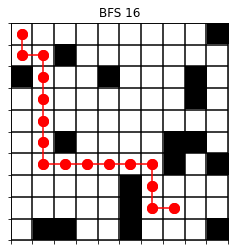

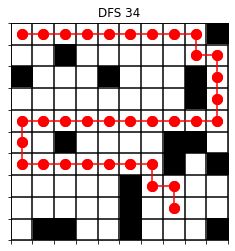

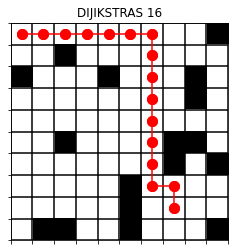

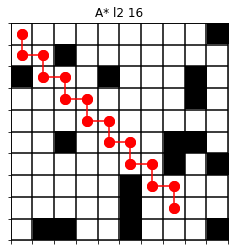

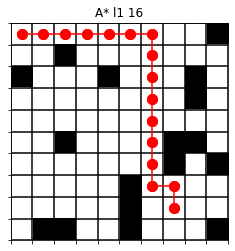

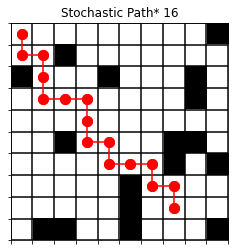

In [ ]:
wall_list = [(1,1), (1,2), (2,1), (3,3),(3,2) ,(4,4), (5,5),(5,1),(5,2),(5,3),(6,6), (7,7)]
maze = Maze(10, 10,wall_list, stochastic_wall= True)
start = (0, 0)
end = (8, 7)
bfs_path = bfs(maze, start, end)
dfs_path = dfs(maze, start, end)
dij_path = a_star(maze, start, end, dij_heuristic)
l2_a_path = a_star(maze, start, end, l2_heuristic)
l1_a_path = a_star(maze, start, end, l1_heuristic)
s_path = stochastic_path_traversal(maze, start, end, normal_random_heuristic)
if not bfs_path:
    print("Cannot Reach. Wall at target or start")
else:
    visualize_maze(maze,bfs_path,title = "BFS {0}".format(len(bfs_path)))
    visualize_maze(maze,dfs_path,title = "DFS {0}".format(len(dfs_path)))
    visualize_maze(maze,dij_path,title = "DIJIKSTRAS {0}".format(len(dij_path)))
    visualize_maze(maze,l2_a_path,title = "A* l2 {0}".format(len(l2_a_path)))
    visualize_maze(maze,l1_a_path,title = "A* l1 {0}".format(len(l1_a_path)))
    visualize_maze(maze,s_path,title = "Stochastic Path* {0}".format(len(s_path)))

